In [1]:
import pandas as pd 
df  = pd.read_csv('stroke-data.csv')
df.head()

C:\Users\thilks\AppData\Local\Temp\ipykernel_37476\46657623.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [2]:

shape = df.shape

print("Shape of data:", shape)

# Statistical Summary
print("Statistical Summary:")
print(df.describe())


Shape of data: (5110, 12)
Statistical Summary:
                 id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.00000

In [6]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [8]:

numerical_columns = df.select_dtypes(include=['number'])
null_values_numerical = numerical_columns.isnull().sum()
print("Null values in numerical columns:\n", null_values_numerical)

# Fill null values in numerical columns with column averages
data_filled = numerical_columns.fillna(numerical_columns.mean())

# Replace the filled numerical columns in the original DataFrame
df[data_filled.columns] = data_filled

# Check if null values in numerical columns are filled
null_values_filled_numerical = df.select_dtypes(include=['number']).isnull().sum()
print("\nNull values in numerical columns after filling:\n", null_values_filled_numerical)


Null values in numerical columns:
 id                     0
age                    0
hypertension           0
heart_disease          0
avg_glucose_level      0
bmi                  201
stroke                 0
dtype: int64

Null values in numerical columns after filling:
 id                   0
age                  0
hypertension         0
heart_disease        0
avg_glucose_level    0
bmi                  0
stroke               0
dtype: int64


In [14]:
values = df.groupby('work_type')['age'].agg(['mean','median'])

mode = df.groupby('work_type')['age'].apply(lambda x: x.mode().iloc[0])

statistics = pd.concat([values, mode.rename('mode')], axis=1)

print(statistics)

                    mean  median  mode
work_type                             
Govt_job       50.879756    51.0  50.0
Never_worked   16.181818    16.0  17.0
Private        45.503932    45.0  57.0
Self-employed  60.201465    63.0  78.0
children        6.841339     6.0   5.0


<Axes: ylabel='Density'>

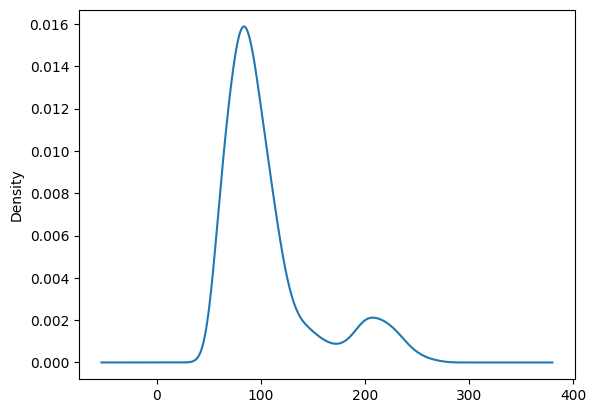

In [17]:
df['avg_glucose_level'].plot.density()

In [23]:
df[(df['avg_glucose_level'] >= (df['avg_glucose_level'].mean() - df['avg_glucose_level'].std())) & 
   (df['avg_glucose_level'] <= (df['avg_glucose_level'].mean() + df['avg_glucose_level'].std()))]['avg_glucose_level'].count()/len(df['avg_glucose_level'])

0.8084148727984345

In [27]:
df[(df['avg_glucose_level'] >= (df['avg_glucose_level'].mean() - 2*df['avg_glucose_level'].std())) & 
   (df['avg_glucose_level'] <= (df['avg_glucose_level'].mean() + 2*df['avg_glucose_level'].std()))]['avg_glucose_level'].count()/len(df['avg_glucose_level'])

0.9080234833659491

In [26]:
outliers = df[(df['avg_glucose_level'] >= (df['avg_glucose_level'].mean() - 3*df['avg_glucose_level'].std())) & 
   (df['avg_glucose_level'] <= (df['avg_glucose_level'].mean() + 3*df['avg_glucose_level'].std()))]['avg_glucose_level'].count()/len(df['avg_glucose_level'])

print("Percentage of data within ±3 standard deviations from the mean:",outliers)

Percentage of data within ±3 standard deviations from the mean: 0.9904109589041096


In [28]:
#Another method
mean_age = df['age'].mean()
std_age = df['age'].std()
lower_bound_age = mean_age - 3 * std_age
upper_bound_age = mean_age + 3 * std_age
outliers_age = df[(df['age'] < lower_bound_age) | (df['age'] > upper_bound_age)]
print("Number of outliers in age column:", outliers_age.shape[0])
print("Percentage of data within ±3 standard deviations from the mean:", 1 - outliers_age.shape[0] / len(df))

Number of outliers in age column: 0
Percentage of data within ±3 standard deviations from the mean: 1.0


C:\Users\thilks\AppData\Local\Temp\ipykernel_37476\1112710054.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['avg_glucose_level'], shade=True, color="blue", label="Avg_gulcose_lvl")


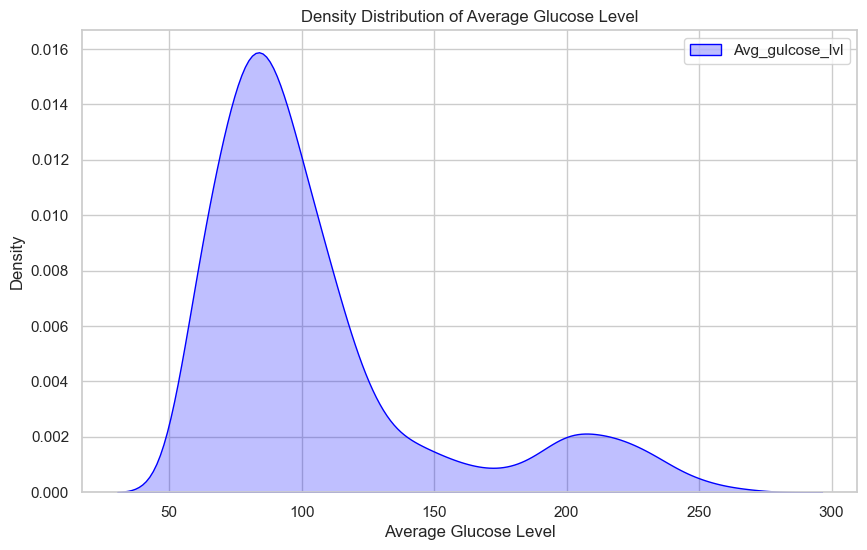

C:\Users\thilks\AppData\Local\Temp\ipykernel_37476\1112710054.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['age'], shade=True, color="red", label="Age")


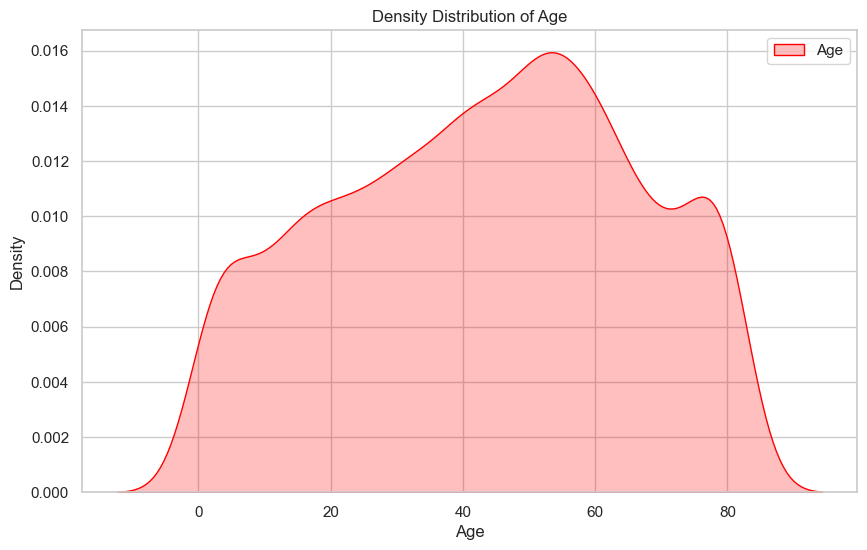

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

#The density distribution for the "avg_glucose_level" variable
plt.figure(figsize=(10, 6))
sns.kdeplot(df['avg_glucose_level'], shade=True, color="blue", label="Avg_gulcose_lvl")
plt.title("Density Distribution of Average Glucose Level")
plt.xlabel("Average Glucose Level")
plt.ylabel("Density")
plt.legend()
plt.show()


#for the "age" variable:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['age'], shade=True, color="red", label="Age")
plt.title("Density Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Density")
plt.legend()
plt.show()
